# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Sklearn

## Data

In [1]:
from sklearn.datasets import load_wine


wine = load_wine()
x, y = wine.data[:, :2], wine.target

## Preprocessing

In [2]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_yest = train_test_split(x, y, random_state = 0)

## Modeling & Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, test_idx = None, resolution=0.02):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[ : len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:,0].max() + 1
    x2_min, x2_max = x[ : 1].min(), x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                           np.arange(x2_min, x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0],
                    y = x[y == cl, 1],
                    alpha=0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
    
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        
        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c = '',
                    edgecolor = 'black',
                    alpha=1.0,
                    linewidth=1,
                    marker = 'o',
                    s=100,
                    label = 'test set')

### layer size [10]

In [7]:
from sklearn.neural_network import MLPClassifier


layer_size = [10]
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes = layer_size)
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)

0.7819548872180451

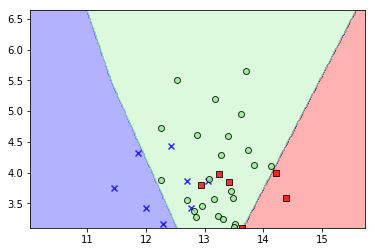

In [8]:
plot_decision_regions(x_train, y_train, classifier = mlp)
plt.show()

### layer size [10, 10]

In [9]:
layer_size = [10, 10]
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes = layer_size)
mlp.fit(x_train, y_train)
mlp.score(x_train, y_train)

0.7819548872180451

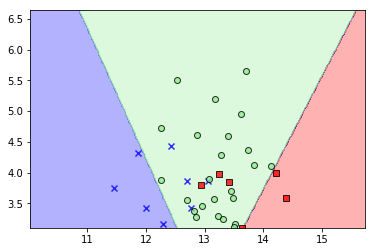

In [10]:
plot_decision_regions(x_train, y_train, classifier = mlp)
plt.show()

# Keras

## Data

In [13]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils


(X_train, y_train), (X_test, y_test) = mnist.load_data()

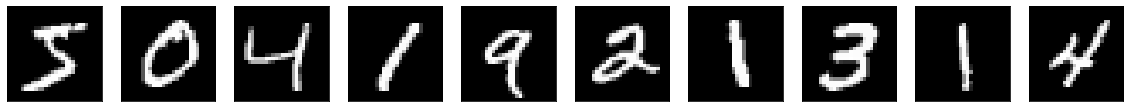

In [14]:
import matplotlib.pyplot as plt


def mnist_plot(X, n):
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
n = 10
mnist_plot(X_train, n)

## Preprocessing

In [15]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
num_classes = 10
yy_train = np_utils.to_categorical(y_train, num_classes)
yy_test = np_utils.to_categorical(y_test, num_classes)

## Modeling

* SGD(...) default  
* optimizer = SGD(lr=0.01, decay=0., momentum=0., nesterov=False)  
* lr: float >= 0.  
    Learning rate.  
* momentum: float >= 0.  
    Parameter that accelerates SGD in the relevant direction and dampens oscillations.
* decay: float >= 0. 
    Learning rate decay over each update. 
* nesterov: boolean.  
    Whether to apply Nesterov momentum.

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
from keras.optimizers import SGD


def MLP(input_size, num_classes, optimizer):
    model = Sequential()
    
    model.add(Dense(units=64,
                    input_dim=input_size,
                    activation='relu',
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-5)))
    model.add(Dense(units=32, 
                    activation='relu',
                    kernel_regularizer=l1_l2(l1=1e-5, l2=1e-5)))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer,
                  metrics=['acc'])
    return model


input_size = np.prod(X_train.shape[1:])
#optimizer = 'sgd'
optimizer = SGD(lr=0.1, decay=0., momentum=0., nesterov=False)

model = MLP(input_size, num_classes, optimizer=optimizer)

model.summary()

W0530 19:11:27.899800  2300 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.callbacks import ModelCheckpoint
filepath = r"C:\Users\user\Desktop\model.h5"
model_checkpoint = ModelCheckpoint(monitor='val_loss',
                                   filepath=filepath,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='min',
                                   period=1)

In [18]:
batch_size = 32
epochs = 5

model_fit = model.fit(X_train, yy_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      shuffle=True,
                      validation_data=(X_test, yy_test),
                      callbacks=[model_checkpoint],
                      verbose=1)

W0530 19:12:07.159044  2300 module_wrapper.py:139] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.3310 - acc: 0.9087 - val_loss: 0.1969 - val_acc: 0.9469
Epoch 2/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.1681 - acc: 0.9584 - val_loss: 0.1503 - val_acc: 0.9621
Epoch 3/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.1344 - acc: 0.9682 - val_loss: 0.1583 - val_acc: 0.9597
Epoch 4/5
60000/60000 [==============================] - 14s 227us/step - loss: 0.1135 - acc: 0.9752 - val_loss: 0.1411 - val_acc: 0.9637
Epoch 5/5
60000/60000 [==============================] - 12s 201us/step - loss: 0.1025 - acc: 0.9781 - val_loss: 0.1417 - val_acc: 0.9676


## Evaluation

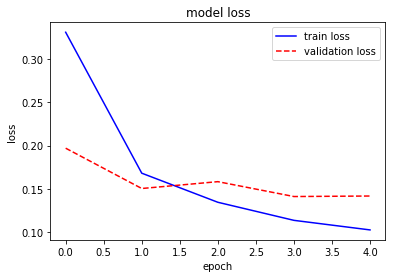

In [19]:
plt.figure()
plt.plot(model_fit.history['loss'], label='train loss', color='blue', linestyle='-')
plt.plot(model_fit.history['val_loss'], label='validation loss', color='red', linestyle='--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [20]:
yy_test_pred = model.predict(X_test)
model.evaluate(X_train, yy_train)
model.evaluate(X_test, yy_test)

10000/10000 [==============================] - 1s 81us/step


[0.14165632848739623, 0.9675999879837036]

## Load Model

In [21]:
from keras.models import load_model


model = load_model(filepath)

In [22]:
yy_test_pred = model.predict(X_test)
model.evaluate(X_train, yy_train)
model.evaluate(X_test, yy_test)

10000/10000 [==============================] - 1s 133us/step


[0.14105785202383994, 0.963699996471405]